In [135]:
## Program developed for graphing and interpreting brain wave results

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
import os
import csv
from sklearn.model_selection import train_test_split
#------------------
from scipy import fft, arange, signal

In [303]:
path_happy = "../../data/3-Happiness/"
path_neutral = "../../data/6-Neutral/"

In [304]:
def find_files(PATH):
    """
    Finds all the files in a particular directory. Return only .csv files.
    """
    files = []
    for r, d, f in os.walk(PATH):
        for file in f:
            if '.csv' in file:
                files.append(os.path.join(r, file).replace("\\","/"))
    return files

In [305]:
files_happy = find_files(path_happy)
files_neutral = find_files(path_neutral)

In [306]:
def remove_meta_data(PATH):
    """
    Return:
    1. Changes in Electric potential based on Unix timestamp from
        the 5 channels of the Emotiv headset. 2 channels from the Frontal Lobe, 
        1 channel from the parietal lobe, and 2 from temporal lobe.
    2. Pandas Dataframe of the data reflected from (1).
    """
    reader = csv.reader(open(PATH, "rt"), delimiter='\t')
    i = 0
    one_file_data = []
    for line in reader:
        if(i > 0):
            one_file_data.append(line)
        i += 1
    one_file_data = np.array(one_file_data)
    columns = one_file_data[0][0].split(",")[3:8]
    row_data = []
    for rows in one_file_data[1:]:
        row_data.append(rows[0].split(",")[3:8])
    dataframe = pd.DataFrame(row_data, columns=columns)
    return np.array(row_data), dataframe

In [307]:
def data_DF_dir(list_PATH):
    """
    Returns all the data from a given set of path files and its associated pandas dataframe object.
    """
    raw_data = []
    dataframes = []
    for file in list_PATH:
        rd, dfob = remove_meta_data(file)
        raw_data.append(rd)
        dataframes.append(dfob)
    return raw_data, dataframes

In [308]:
data_HAPPY, df_HAPPY = data_DF_dir(files_happy)

In [310]:
data_NEUTRAL, df_NEUTRAL = data_DF_dir(files_neutral)

In [419]:
dxt1 = []
dxt2 = []
#---------------
txt1 = []
txt2 = []
#---------------
for x in data_HAPPY[0]:
    dxt1.append(float(x[0]))
    
for x in data_HAPPY[2]:
    dxt2.append(float(x[0]))
#-------------------
for x in data_NEUTRAL[0]:
    txt1.append(float(x[0]))
    
for x in data_NEUTRAL[2]:
    txt2.append(float(x[0]))

In [429]:
start = 100
end = 1000

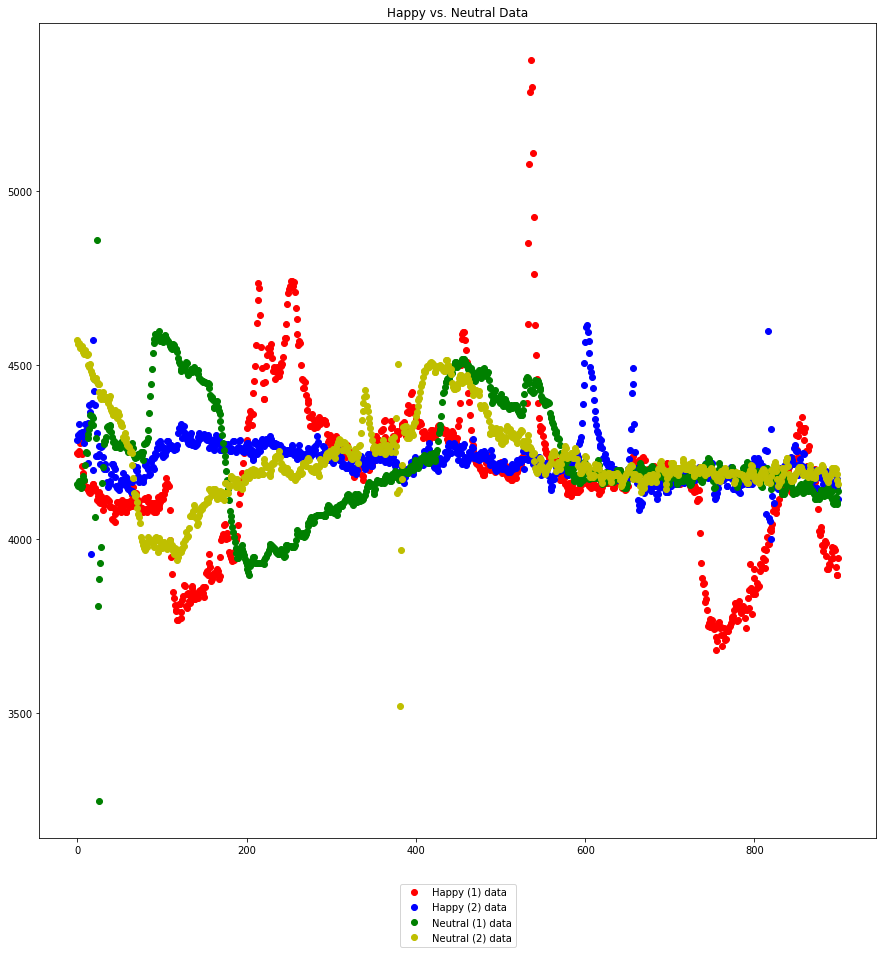

In [437]:
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(111)
ax.plot(dxt1[start:end],'ro', label='Happy (1) data')
ax.plot(dxt2[start:end],'bo', label='Happy (2) data')
ax.plot(txt1[start:end],'go', label='Neutral (1) data')
ax.plot(txt2[start:end],'yo',label='Neutral (2) data')

plt.title('Happy vs. Neutral Data')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
plt.show()

In [403]:
samples = np.arange(0,100)

In [650]:
fft_txt2 = (txt2)
fft_txt1 = (dxt2)
# plt.plot(np.real(dxt2[100:]))
# plt.plot(np.real(txt2[100:]))

In [651]:
import pywt

In [652]:
cA, cD = (pywt.dwt(fft_txt1,'rbio3.3'))
cA1, cD1 = (pywt.dwt(fft_txt2,'rbio3.3'))

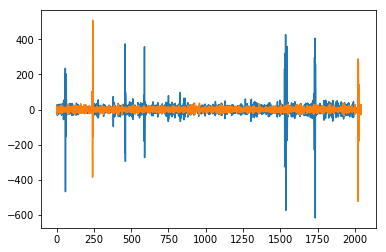

In [654]:
plt.plot(cA)
plt.plot(cA1)

In [587]:
print(pywt.wavelist(kind='discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']
